### `simulation.ipynb`
----------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import langevin as lg
import importlib

sim = lg.Langevin3D()

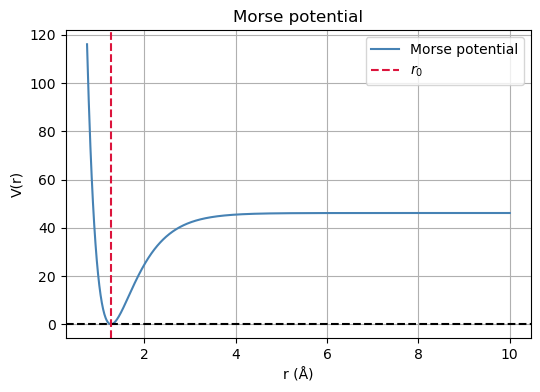

In [72]:
rv = np.linspace(0.75, 10, 1000)
pv = sim.potential_Morse(rv)

plt.figure(figsize=(6, 4))
plt.plot(rv, pv, label='Morse potential', color='steelblue')
plt.grid()
plt.axhline(0, color='black', lw=1.5, ls='--')
plt.axvline(sim.r_0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel(r"r (Å)")
plt.ylabel("V(r)")
plt.title("Morse potential")
plt.legend(loc='upper right')

In [65]:
importlib.reload(lg)
sim = lg.Langevin3D(seed=1, T=300)
time, traj, speed = sim.run(n_steps=10000, r_init=sim.r_0, v_init=0)

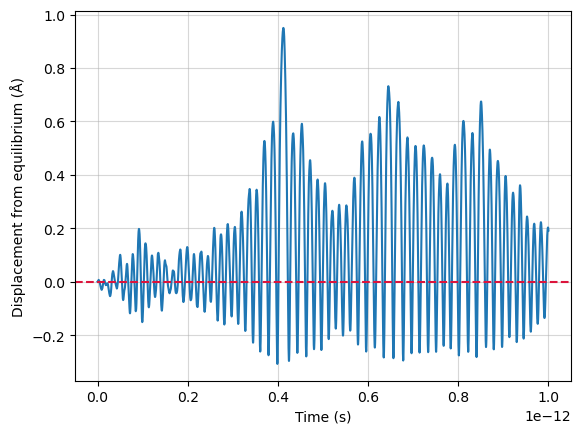

In [74]:
plt.plot(time, np.array(traj) - sim.r_0)
plt.axhline(0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel("Time (s)")
plt.ylabel("Displacement from equilibrium (Å)")
plt.grid(True, alpha=0.5)